In [ ]:
# XGBoost does not come with Anaconda, so you may have to install it before running the models below.
# pip install xgboost


## Import packages

In [1]:
# Import standard packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import LR, KNN, NB, SVM, DT, RF, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Load the cleaned dataset

In [2]:
df = pd.read_csv(r'C:\Users\Edward\OneDrive\METIS files from Gigabyte laptop\METIS Project 3\banking_dataset_cleaned.csv', index_col=False).drop(['Unnamed: 0'], axis=1)

In [3]:
# Find the values that were most frequent in each column
df.mode()

,age,balance,day_of_month,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,admin.,blue-collar,entrepreneur,...,jun,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit)
0,31,0,20,97,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.describe()

,age,balance,day_of_month,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,admin.,blue-collar,entrepreneur,...,jun,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit)
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.119513,0.174162,0.029385,...,0.109479,0.024727,0.253001,0.084483,0.035119,0.028579,0.048110,0.095951,0.745924,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.324405,0.379266,0.168892,...,0.312253,0.155298,0.434751,0.278123,0.184089,0.166628,0.214008,0.294537,0.435360,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
colnames = list(df.columns.values)
colnames

['age',
 'balance',
 'day_of_month',
 'duration',
 'num_contacts_during_cmpgn',
 'days_passed_after_last_contact',
 'num_contacts_b4_campgn',
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown(job)',
 'divorced',
 'married',
 'single',
 'primary',
 'secondary',
 'tertiary',
 'unknown(education)',
 'yes(default)',
 'yes(housing)',
 'yes(loan)',
 'telephone',
 'unknown(contact)',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'other(outcome)',
 'success(outcome)',
 'unknown(outcome)',
 'yes(deposit)']

### Create a new column called 'No. of deposits' 

In [6]:
df['no. of deposits'] = df['yes(deposit)']

In [7]:
df.head()

,age,balance,day_of_month,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,admin.,blue-collar,entrepreneur,...,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit),no. of deposits
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,1


### Function that creates a scatterplot of the target variable superimposed on a histogram of any variable

In [8]:
# Input is the name of the variable (eg. 'age'). Make sure to include ''
# To understand what each individual line does, do a print()

def histogram(var):
    
    # Group the dataframe by variable and if customer purchased the term deposit, and count the total number of people who purchased
    # and did not purchase the term deposit by each category.
    df_test = df.groupby([var, 'yes(deposit)'], as_index=False)[['no. of deposits']].count()

    # Create new dataframes with a column of the total number of people who purchased (yes(deposit)=1) and did not purchase for each category
    df_test_0 = df_test[df_test['yes(deposit)'] == 0]
    df_test_1 = df_test[df_test['yes(deposit)'] == 1]
    
    # Merge the dataset on the varaible of choice
    df_test_all = pd.merge(df_test_0, df_test_1, on=var)
    
    # Create a column representing all deposits in a particular category of your variable (eg. age: 18)
    df_test_all['all deposits'] = df_test_all['no. of deposits_x'] + df_test_all['no. of deposits_y']
    
    # Create a column that shows the probability of the person buying a term deposit in that particular category (eg. 56%)
    df_test_all['prob_deposit'] = df_test_all['no. of deposits_y'] / df_test_all['all deposits']

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(var, size=20)
    ax1.set_ylabel('No. of people', color=color, size=17)
    
    ax1.hist(df[var], bins=10, color=color, ec='black')  # Adjust the number of bins here
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
    
    # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.set_ylabel('Probability of purchase', color=color, size=17)  # we already handled the x-label with ax1
    ax2.scatter(df_test_all[var],df_test_all['prob_deposit'], color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.xticks(fontsize=20)
    plt.title('Probability of Purchase based on {}'.format(var), fontsize=20)
    plt.show()


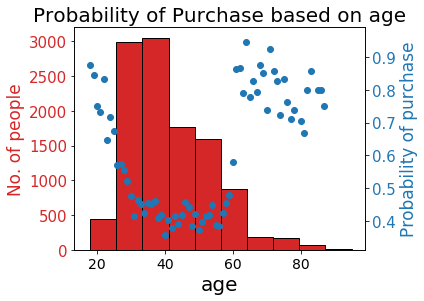

In [9]:
''' 
Create scatterplot/histogram of any of the following numerical variables:
'age',
'balance',
'day_of_month',
'duration',
'num_contacts_during_cmpgn',
'days_passed_after_last_contact',
'num_contacts_b4_campgn', 
'''

histogram('age')

## Let's run some ML models on the original dataset. We can remove the target variable column from data to assign as X and assign the target variable column to y


In [10]:
X = df.drop(['yes(deposit)','no. of deposits'], axis=1)
y = df['yes(deposit)']

print(X.shape)
print(y.shape)

(11162, 45)
(11162,)


### We can use the following classification algorithms to calculate the F1 score:

1. Logistic Regression
2. K-Nearest Neighbor
3. Naive Bayes Classifier
4. Support Vector Machines (LinearSVC)
5. Decision Trees
6. Random Forest
7. XGBoost


## Creating a function to split data into training (60%), validation (20%) and test sets (20%) and create a DataFrame of the F1 score of all models

In [11]:
def f1_dataframe(X, y):

    # Splitting the data into 80% training data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
 
    # Initialize all model objects and fit the models on the training data
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    svm_model = LinearSVC()
    svm_model.fit(X_train, y_train)

    decisiontree = DecisionTreeClassifier(max_depth=3)
    decisiontree.fit(X_train, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train, y_train)
    
    xgboost = XGBClassifier()
    xgboost.fit(X_train, y_train)
    f1_score(xgboost.predict(X_val),y_val)

    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_val), y_val), f1_score(knn.predict(X_val), y_val),
                        f1_score(gnb.predict(X_val), y_val), f1_score(svm_model.predict(X_val), y_val),
                       f1_score(decisiontree.predict(X_val), y_val), f1_score(randomforest.predict(X_val), y_val),
                       f1_score(xgboost.predict(X_val),y_val)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN','Gaussian NB','LinearSVC','Decision Trees','Random Forests', 'XGBoost'])  
                
    # Whenever this function is called, return a dataframe with these values
    return df_f1

## Creating a function to split data into training (60%), validation (20%) and test sets (20%) and create a DataFrame of the AUC of all models


In [12]:
def auc_dataframe(X, y):

    # Splitting the data into 80% training data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
 
    # Initialize all model objects and fit the models on the training data
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    svm_model = LinearSVC()
    svm_model.fit(X_train, y_train)

    decisiontree = DecisionTreeClassifier(max_depth=3)
    decisiontree.fit(X_train, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train, y_train)
    
    xgboost = XGBClassifier()
    xgboost.fit(X_train, y_train)
        
    # Create a list of AUC score of all models
    auc_data = {'AUC': [roc_auc_score(y_val, lr.predict_proba(X_val)[:,1]), roc_auc_score(y_val, knn.predict_proba(X_val)[:,1]),
                        roc_auc_score(y_val, gnb.predict_proba(X_val)[:,1]), 0,
                        roc_auc_score(y_val, decisiontree.predict_proba(X_val)[:,1]), roc_auc_score(y_val, randomforest.predict_proba(X_val)[:,1]),
                        roc_auc_score(y_val, xgboost.predict_proba(X_val)[:,1])]}
                          
    # Create DataFrame with the model names as column labels        
    df_auc = pd.DataFrame(auc_data, index=['Log Regression','KNN','Gaussian NB','LinearSVC','Decision Trees','Random Forests', 'XGBoost'])    
        
    # Whenever this function is called, return a dataframe with these values
    return df_auc

In [13]:
f1_dataframe(X, y)

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,F1 Score
Log Regression,0.822475
KNN,0.737092
Gaussian NB,0.664416
LinearSVC,0.781963
Decision Trees,0.809926
Random Forests,0.863919
XGBoost,0.849456


In [14]:
auc_dataframe(X,y)

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,AUC
Log Regression,0.907189
KNN,0.819955
Gaussian NB,0.832617
LinearSVC,0.000000
Decision Trees,0.843765
Random Forests,0.922263
XGBoost,0.921195


### It seems that the top features shown by F1 score and AUC corroborate each other as they are supposed to

## Let's see how our ROC curve looks like

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


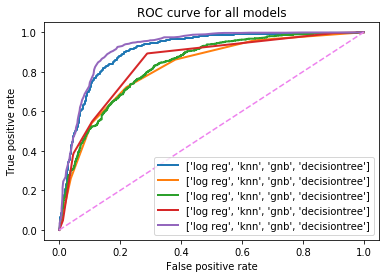

In [30]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
svm_model = LinearSVC()
decisiontree = DecisionTreeClassifier(max_depth=3)
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Splitting the data into 80% training data and 20% testing data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the training data into 60% training data and 20% validation data.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

models = [lr, knn, gnb, decisiontree, randomforest]
models_label = ['log reg','knn','gnb','decisiontree','randomforest']

models_dict = {lr: 'lr', knn: 'knn', gnb: 'gnb', decisiontree: 'decisiontree', randomforest: 'randomforest'}

for i in models_dict.keys():
    i.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_val, i.predict_proba(X_val)[:,1])
    plt.plot(fpr, tpr, label=models_label[0:4], lw=2)

# Plot the line where 
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for all models');
# print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

## We can do some feature engineering to see if we can get a better F1 score on our validation data. We can modify the data in the following ways:

### 1. Standardize the data using Min-Max scaler such that all values are within the range of 0-1
### 2. Remove variables that have correlations between -0.1 and 0.1 manually
### 3. Remove variables recommended by Random Forest



## Standardize the data using Min-Max scaler such that all values are within the range of 0-1

In [31]:
# Initiate MinMaxScaler object. 
# We use MinMaxScaler as it can be used for skewed data

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=list(df.columns.values))

In [32]:
# All values are now in the range from 0 to 1.
scaled_df.describe()

,age,balance,day_of_month,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,admin.,blue-collar,entrepreneur,...,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit),no. of deposits
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.301714,0.095121,0.488601,0.095384,0.024329,0.061205,0.014354,0.119513,0.174162,0.029385,...,0.024727,0.253001,0.084483,0.035119,0.028579,0.048110,0.095951,0.745924,0.473840,0.473840
std,0.154719,0.036631,0.280691,0.089489,0.043904,0.127203,0.039517,0.324405,0.379266,0.168892,...,0.155298,0.434751,0.278123,0.184089,0.166628,0.214008,0.294537,0.435360,0.499338,0.499338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.079147,0.233333,0.035061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.084008,0.466667,0.065223,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.402597,0.097160,0.700000,0.127352,0.032258,0.025439,0.017241,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Scaled dataset split into X and Y

X_scaled = scaled_df.drop(['yes(deposit)', 'no. of deposits'], axis=1)
y_scaled = scaled_df['yes(deposit)']

print(X_scaled.shape)
print(y_scaled.shape)

(11162, 45)
(11162,)


## Remove variables that have correlations between -0.1 and 0.1 manually

In [34]:
# Finding all variables with a correlation between -0.1 to 0.1
all_corr = df.corr()

# Arrange all correlations into one column
unstacked = all_corr.unstack()

# Filter correlations between target variable and all other variables
unstacked_yes = unstacked['yes(deposit)']

# Filter correlations that are between -0.1 and 0.1
low_corr = unstacked_yes[(unstacked['yes(deposit)'] < 0.1) & (unstacked['yes(deposit)'] > -0.1)]

# No. of variables that have low correlation.
print(len(low_corr))

# Create a list of the column labels that have unacceptably low correlation
remove_variables = low_corr.index

print(remove_variables)

30
Index(['age', 'balance', 'day_of_month', 'admin.', 'entrepreneur', 'housemaid',
       'management', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown(job)', 'divorced', 'married', 'single',
       'primary', 'secondary', 'tertiary', 'unknown(education)',
       'yes(default)', 'telephone', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'nov', 'other(outcome)'],
      dtype='object')


In [35]:
# Create a deep copy of the dataframe and we remove the useless variable
# We create a deep copy to ensure that the variable is not affected

df_remove = df.copy(deep=True)


In [36]:
# Remove the columns that have low correlation.

for i in remove_variables:
    df_remove.drop([i], axis=1, inplace=True)

df_remove.head()

,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,blue-collar,retired,yes(housing),yes(loan),unknown(contact),mar,may,oct,sep,success(outcome),unknown(outcome),yes(deposit),no. of deposits
0,1042,1,-1,0,0,0,1,0,1,0,1,0,0,0,1,1,1
1,1467,1,-1,0,0,0,0,0,1,0,1,0,0,0,1,1,1
2,1389,1,-1,0,0,0,1,0,1,0,1,0,0,0,1,1,1
3,579,1,-1,0,0,0,1,0,1,0,1,0,0,0,1,1,1
4,673,2,-1,0,0,0,0,0,1,0,1,0,0,0,1,1,1


In [42]:
X_remove = df_remove.drop(['yes(deposit)', 'no. of deposits'], axis=1)
y_remove = df_remove['yes(deposit)']
X_remove.head()

,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,blue-collar,retired,yes(housing),yes(loan),unknown(contact),mar,may,oct,sep,success(outcome),unknown(outcome)
0,1042,1,-1,0,0,0,1,0,1,0,1,0,0,0,1
1,1467,1,-1,0,0,0,0,0,1,0,1,0,0,0,1
2,1389,1,-1,0,0,0,1,0,1,0,1,0,0,0,1
3,579,1,-1,0,0,0,1,0,1,0,1,0,0,0,1
4,673,2,-1,0,0,0,0,0,1,0,1,0,0,0,1


## Remove variables recommended by Random Forest

### Before that, let's see what are the top 10 features Random Forest considers as important

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'Code below also achieves the same result'

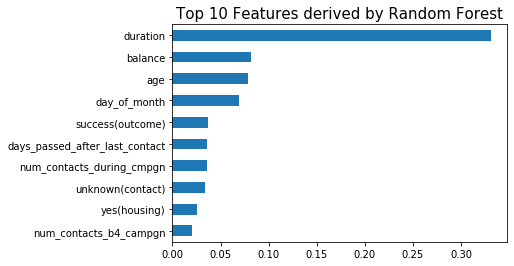

In [44]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_estimators=100)

# Train model
model = clf.fit(X, y)

# Plot the top 10 features based on its importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.title('Top 10 Features derived by Random Forest', size=15)

'''Code below also achieves the same result'''
# Calculate feature importances
# importances = model.feature_importances_

# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]

# # Rearrange feature names so they match the sorted feature importances
# names = [colnames[i] for i in indices]

# # Create plot
# plt.figure(figsize=[20,20])

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.barh(range(X.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.yticks(range(X.shape[1]), names)
# plt.gca().invert_yaxis()

# # Show plot
# plt.show()

### Let's use SelectFromModel to identify the features which are greater than the mean importance

In [45]:
# Specify random forest instance, indicate the number of trees
# Use SelectFromModel to automatically select the features

sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train, y_train)

# See which features are important. Those with value of True are features whose
# importance is greater than mean importance.
sel.get_support()

# Make a list and count selected features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

# Get names of the features
print(selected_feat)

Index(['age', 'balance', 'day_of_month', 'duration',
       'num_contacts_during_cmpgn', 'days_passed_after_last_contact',
       'num_contacts_b4_campgn', 'yes(housing)', 'unknown(contact)',
       'success(outcome)'],
      dtype='object')


In [46]:
# Create separate dataset of X and y that only has variables deemed to be important by Random Forest
df_random = df[selected_feat]
df_random = pd.concat([df_random, df['yes(deposit)']], axis=1)
df_random.head(3)
X_random = df_random.drop(['yes(deposit)'], axis=1)
y_random = df_random['yes(deposit)']

### Let's see the F1 scores of our models on various changes made to the dataset

In [47]:
# Original Dataset

df_orig = pd.DataFrame(f1_dataframe(X,y))
df_orig.rename(columns={'F1 Score': 'F1 Score(orig)'}, inplace=True)
df_orig

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,F1 Score(orig)
Log Regression,0.822475
KNN,0.737092
Gaussian NB,0.664416
LinearSVC,0.813636
Decision Trees,0.809926
Random Forests,0.863919
XGBoost,0.849456


In [54]:
# Scaled Dataset
f1_dataframe(X_scaled, y_scaled)

df_scaled = pd.DataFrame(f1_dataframe(X_scaled, y_scaled))
df_scaled.rename(columns={'F1 Score': 'F1 Score(scaled)'}, inplace=True)
df_scaled

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,F1 Score(scaled)
Log Regression,0.814681
KNN,0.682398
Gaussian NB,0.614943
LinearSVC,0.815487
Decision Trees,0.809926
Random Forests,0.863277
XGBoost,0.849456


In [49]:
# Dataset with variables removed manually
f1_dataframe(X_remove, y_remove)

df_remove = pd.DataFrame(f1_dataframe(X_remove,y_remove))
df_remove.rename(columns={'F1 Score': 'F1 Score(remove)'}, inplace=True)
df_remove

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,F1 Score(remove)
Log Regression,0.795357
KNN,0.759582
Gaussian NB,0.641320
LinearSVC,0.799596
Decision Trees,0.809926
Random Forests,0.792761
XGBoost,0.832858


In [50]:
# Dataset with variables recommended to be removed by Random Forest
f1_dataframe(X_random, y_random)

df_random = pd.DataFrame(f1_dataframe(X_random,y_random))
df_random.rename(columns={'F1 Score': 'F1 Score(random)'}, inplace=True)
df_random


C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,F1 Score(random)
Log Regression,0.783767
KNN,0.736342
Gaussian NB,0.663539
LinearSVC,0.661174
Decision Trees,0.805732
Random Forests,0.835632
XGBoost,0.829099


In [55]:
# Calculate average F1 score
f1_all = pd.concat([df_orig, df_scaled, df_remove, df_random], axis=1)
f1_all['avg'] = f1_all.mean(axis=1)
f1_all


,F1 Score(orig),F1 Score(scaled),F1 Score(remove),F1 Score(random),avg
Log Regression,0.822475,0.814681,0.795357,0.783767,0.804070
KNN,0.737092,0.682398,0.759582,0.736342,0.728853
Gaussian NB,0.664416,0.614943,0.641320,0.663539,0.646054
LinearSVC,0.813636,0.815487,0.799596,0.661174,0.772473
Decision Trees,0.809926,0.809926,0.809926,0.805732,0.808878
Random Forests,0.863919,0.863277,0.792761,0.835632,0.838897
XGBoost,0.849456,0.849456,0.832858,0.829099,0.840217


## Let's plot a line graph that shows how the F1 score compares across various models and across various datasets

Text(0.5, 1.0, 'F1 Score of ML models')

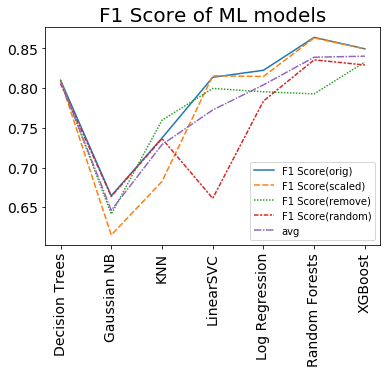

In [56]:
sns.lineplot(data=f1_all, size=[10,10])
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title('F1 Score of ML models', fontsize=20)

## Seems that feature scaling and removing variables does not help our models to a significant extent. The top performer is Random Forests model

## Let's try K-fold cross validation on all models

In [57]:
# Instantiate model objects
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
svm_model = LinearSVC()
decisiontree = DecisionTreeClassifier(max_depth=3)
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = XGBClassifier()

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

# Find mean F1 CV score of all models
lr_crossval = np.mean(cross_val_score(lr, X_train_val, y_train_val, cv=kf, scoring='f1'))
knn_crossval = np.mean(cross_val_score(knn, X_train_val, y_train_val, cv=kf, scoring='f1'))
gnb_crossval = np.mean(cross_val_score(gnb, X_train_val, y_train_val, cv=kf, scoring='f1'))
svm_crossval = np.mean(cross_val_score(svm_model, X_train_val, y_train_val, cv=kf, scoring='f1'))
decisiontree_crossval = np.mean(cross_val_score(decisiontree, X_train_val, y_train_val, cv=kf, scoring='f1'))
randomforest_crossval = np.mean(cross_val_score(randomforest, X_train_val, y_train_val, cv=kf, scoring='f1'))
xgboost = np.mean(cross_val_score(xgboost, X_train_val, y_train_val, cv=kf, scoring='f1'))

sorted_models = sorted([lr_crossval, knn_crossval, gnb_crossval, svm_crossval, decisiontree_crossval, randomforest_crossval, xgboost])
print(sorted_models)

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[0.5953891574804622, 0.6643667172214214, 0.7262946536749079, 0.7850184574757689, 0.8137940569823398, 0.8403465011192746, 0.8503125843497562]


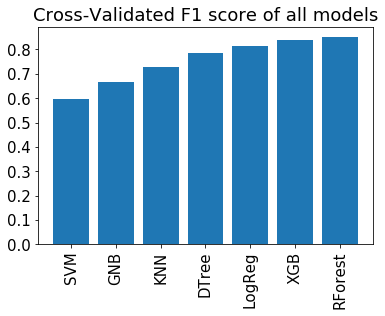

In [61]:
# Plot the chart showing the CV validated F1 score of all models

f, ax = plt.subplots()

labels = ['SVM','GNB','KNN','DTree','LogReg','XGB','RForest']
y_values = [svm_crossval, gnb_crossval, knn_crossval, decisiontree_crossval, lr_crossval, xgboost, randomforest_crossval]

ax.bar(labels, y_values)
ax.set_xticks(labels)
ax.set_xticklabels(labels)
        
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('Cross-Validated F1 score of all models', fontsize=18)
plt.show()

## It seems that Random Forest performs the best with an F1 score of 0.8! Let's see how the confusion matrix looks like for random forest

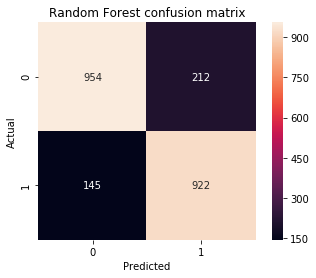

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomforest.fit(X_train, y_train)

logit_confusion = confusion_matrix(y_test, randomforest.predict(X_test))
logit_confusion

sns.heatmap(logit_confusion, annot=True, fmt='.4g', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest confusion matrix');

## Create a DataFrame with only features recommended by Random Forest for pickling


In [63]:
print(selected_feat)

Index(['age', 'balance', 'day_of_month', 'duration',
       'num_contacts_during_cmpgn', 'days_passed_after_last_contact',
       'num_contacts_b4_campgn', 'yes(housing)', 'unknown(contact)',
       'success(outcome)'],
      dtype='object')


In [64]:
df_pickle = pd.DataFrame(df[['age','balance', 'day_of_month', 'num_contacts_during_cmpgn','days_passed_after_last_contact','num_contacts_b4_campgn','yes(housing)','unknown(contact)','success(outcome)','yes(deposit)']])

In [65]:
df_pickle.head()

,age,balance,day_of_month,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,yes(housing),unknown(contact),success(outcome),yes(deposit)
0,59,2343,5,1,-1,0,1,1,0,1
1,56,45,5,1,-1,0,0,1,0,1
2,41,1270,5,1,-1,0,1,1,0,1
3,55,2476,5,1,-1,0,1,1,0,1
4,54,184,5,2,-1,0,0,1,0,1


In [66]:
X_pickle = df_pickle.drop(['yes(deposit)'], axis=1)
y_pickle = df_pickle['yes(deposit)']


## Let's create a pickle file to store our Random Forest Classifier trained on our model

In [ ]:
import pickle

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_pickle,y_pickle)

# Create a new pickle file based on random forest
with open(r"C:\Users\Edward\Desktop\Data Science\METIS Project 3\Flask app for term deposit\term_deposit.pkl", "wb") as f:   # wb means Writing to the file in Binary mode, written in byte objects
    pickle.dump(randomforest, f)